# Batch 25-2022

Parkinson's disease is a progressive nervous system disorder that affects movement. Symptoms start gradually, sometimes starting with a barely noticeable tremor in just one hand. Tremors are common, but the disorder also commonly causes stiffness or slowing of movement.
Symptoms.

Parkinson's disease signs and symptoms can be different for everyone. Early signs may be mild and go unnoticed. Symptoms often begin on one side of your body and usually remain worse on that side, even after symptoms begin to affect both sides.Parkinson's signs and symptoms may include:

Tremor:A tremor, or shaking, usually begins in a limb, often your hand or fingers. You may rub your thumb and forefinger back and forth, known as a pill-rolling tremor. Your hand may tremble when it's at rest.

Slowed movement (bradykinesia):Over time, Parkinson's disease may slow your movement, making simple tasks difficult and time-consuming. Your steps may become shorter when you walk. It may be difficult to get out of a chair. You may drag your feet as you try to walk.

Rigid muscles:Muscle stiffness may occur in any part of your body. The stiff muscles can be painful and limit your range of motion.

Impaired posture and balance:Your posture may become stooped, or you may have balance problems as a result of Parkinson's disease.

Loss of automatic movements:You may have a decreased ability to perform unconscious movements, including blinking, smiling or swinging your arms when you walk.

Speech changes:You may speak softly, quickly, slur or hesitate before talking. Your speech may be more of a monotone rather than have the usual inflections.

Writing changes:It may become hard to write, and your writing may appear small.

(refered from The Michael J. Fox Foundation for Parkinson's Research
https://www.youtube.com/watch?v=cRLB7WqX0fU)

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [3]:
df=pd.read_csv('parkinsons.data')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [4]:
df.shape

(195, 24)

In [5]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [6]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [7]:
df.empty

False

<AxesSubplot:>

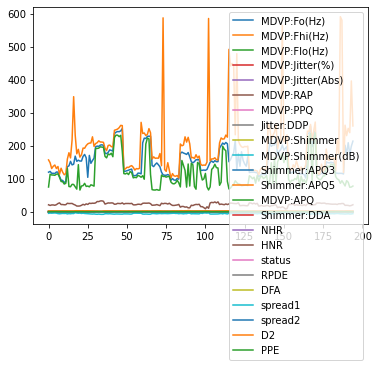

In [8]:
df.plot()

Lets create a separate dataframes which is indepent of each other

In [9]:
voice=pd.DataFrame(df[["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","status"]])
frequency=pd.DataFrame(df[["MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP","status"]])
amptitude=pd.DataFrame(df[["MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA","status"]])
tone=pd.DataFrame(df[["NHR","HNR","status"]])
variation=pd.DataFrame(df[["spread1","spread2","PPE","RPDE","D2","DFA","status"]])
voice

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),status
0,119.992,157.302,74.997,1
1,122.400,148.650,113.819,1
2,116.682,131.111,111.555,1
3,116.676,137.871,111.366,1
4,116.014,141.781,110.655,1
...,...,...,...,...
190,174.188,230.978,94.261,0
191,209.516,253.017,89.488,0
192,174.688,240.005,74.287,0
193,198.764,396.961,74.904,0


In [10]:
frequency

,MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,status
0,0.00784,0.00007,0.00370,0.00554,0.01109,1
1,0.00968,0.00008,0.00465,0.00696,0.01394,1
2,0.01050,0.00009,0.00544,0.00781,0.01633,1
3,0.00997,0.00009,0.00502,0.00698,0.01505,1
4,0.01284,0.00011,0.00655,0.00908,0.01966,1
...,...,...,...,...,...,...
190,0.00459,0.00003,0.00263,0.00259,0.00790,0
191,0.00564,0.00003,0.00331,0.00292,0.00994,0
192,0.01360,0.00008,0.00624,0.00564,0.01873,0
193,0.00740,0.00004,0.00370,0.00390,0.01109,0


In [11]:
amptitude

,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,status
0,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,1
1,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,1
2,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,1
3,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,1
4,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,1
...,...,...,...,...,...,...,...
190,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0
191,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0
192,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0
193,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0


In [12]:
tone

,NHR,HNR,status
0,0.02211,21.033,1
1,0.01929,19.085,1
2,0.01309,20.651,1
3,0.01353,20.644,1
4,0.01767,19.649,1
...,...,...,...
190,0.02764,19.517,0
191,0.01810,19.147,0
192,0.10715,17.883,0
193,0.07223,19.020,0


In [13]:
variation

,spread1,spread2,PPE,RPDE,D2,DFA,status
0,-4.813031,0.266482,0.284654,0.414783,2.301442,0.815285,1
1,-4.075192,0.335590,0.368674,0.458359,2.486855,0.819521,1
2,-4.443179,0.311173,0.332634,0.429895,2.342259,0.825288,1
3,-4.117501,0.334147,0.368975,0.434969,2.405554,0.819235,1
4,-3.747787,0.234513,0.410335,0.417356,2.332180,0.823484,1
...,...,...,...,...,...,...,...
190,-6.538586,0.121952,0.133050,0.448439,2.657476,0.657899,0
191,-6.195325,0.129303,0.168895,0.431674,2.784312,0.683244,0
192,-6.787197,0.158453,0.131728,0.407567,2.679772,0.655683,0
193,-6.744577,0.207454,0.123306,0.451221,2.138608,0.643956,0


In [14]:
voice['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

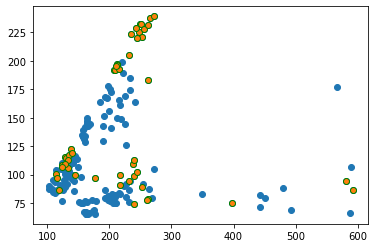

In [31]:
x=voice.values
ind1=np.where(voice['status']==0)
plt.scatter(x[:,1],x[:,2])
plt.scatter(x[ind1,1], x[ind1,2], edgecolors="g")

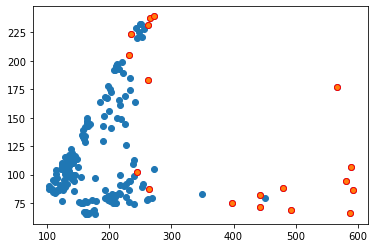

In [52]:
clf = IsolationForest(contamination=.09)
clf.fit(x)
predictions = clf.predict(x)
(predictions<0).mean()
abn_ind = np.where(predictions < 0)
plt.scatter(x[:,1], x[:,2])
plt.scatter(x[abn_ind,1], x[abn_ind,2], edgecolors="r")


In [53]:
voice1=voice.loc[abn_ind]
voice1

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),status,zscore1,zscore2,zscore3
46,245.510,262.090,231.848,0,2.205393,0.710285,2.654403
47,252.455,261.487,182.786,0,2.373187,0.703694,1.527096
62,222.236,231.345,205.495,0,1.643084,0.374243,2.048885
63,228.832,234.619,223.634,0,1.802446,0.410028,2.465668
73,112.014,588.518,107.024,1,-1.019922,4.278134,-0.213702
102,139.224,586.567,66.157,1,-0.362518,4.256809,-1.152711
115,151.872,492.892,69.085,1,-0.056937,3.232944,-1.085434
116,158.219,442.557,71.948,1,0.096409,2.682784,-1.019651
118,178.285,442.824,82.063,1,0.581211,2.685703,-0.787236
120,128.940,479.697,88.251,1,-0.610983,3.088723,-0.645053


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  1.,
         2.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  2.,  1.,  2.,  2.,  4.,
         6.,  2.,  5.,  6., 11.,  2.,  3.,  1.,  6.,  7., 11., 11., 10.,
        11.,  7.,  7.,  9.,  7., 11.,  6.,  5.,  7., 11., 11.]),
 array([-0.16775638, -0.16101137, -0.15426635, -0.14752133, -0.14077631,
        -0.13403129, -0.12728627, -0.12054125, -0.11379624, -0.10705122,
        -0.1003062 , -0.09356118, -0.08681616, -0.08007114, -0.07332612,
        -0.06658111, -0.05983609, -0.05309107, -0.04634605, -0.03960103,
        -0.03285601, -0.02611099, -0.01936597, -0.01262096, -0.00587594,
         0.00086908,  0.0076141 ,  0.01435912,  0.02110414,  0.02784916,
         0.03459417,  0.04133919,  0.04808421,  0.05482923,  0.06157425,
         0.06831927,  0.07506429,  0.0818093 ,  0.08855432,  0.09529934,
         0.10204436,  0.10878938,  0.1155344 ,  0.12227942,  0.12902443,
         0.13576945,  0.14251447,  0.14925949,  0.15600451,

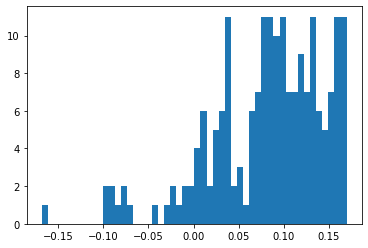

In [54]:
score=clf.decision_function(x)
plt.hist(score,bins=50)

In [55]:
voice1.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),status,zscore1,zscore2,zscore3
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,189.807611,400.237778,134.843056,0.444444,0.859602,2.220236,0.425501
std,52.445865,145.000807,67.473554,0.511310,1.267112,1.584855,1.550353
min,112.014000,231.345000,66.157000,0.000000,-1.019922,0.374243,-1.152711
25%,142.386000,262.535500,83.104250,0.000000,-0.286123,0.715154,-0.763311
50%,200.698000,419.759000,98.191500,0.000000,1.122718,2.433603,-0.416648
75%,234.358000,547.528000,199.817750,1.000000,1.935956,3.830114,1.918438
max,260.105000,592.030000,239.170000,1.000000,2.558014,4.316520,2.822642


0    10
1     8
Name: status, dtype: int64

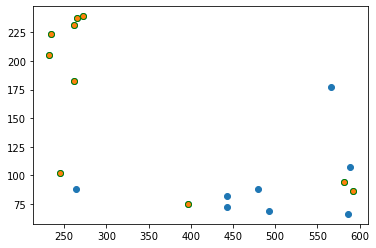

In [56]:
ind=np.where(voice1['status']==0)
plt.scatter(voice1['MDVP:Fhi(Hz)'],voice1['MDVP:Flo(Hz)'])
y=voice1.values
plt.scatter(y[ind,1], y[ind,2], edgecolors="g")
voice1['status'].value_counts()

In [57]:
print("Percentage of Outliers in Original dataset\n",
      (voice1['status'].value_counts()/voice['status'].value_counts())*100)

Percentage of Outliers in Original dataset
 0    20.833333
1     5.442177
Name: status, dtype: float64


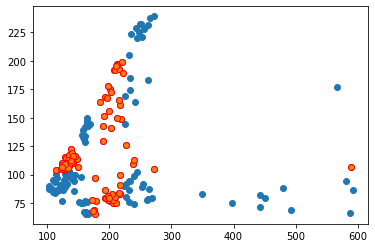

In [69]:
voice['zscore1']=((voice['MDVP:Fo(Hz)']-voice['MDVP:Fo(Hz)'].mean())/voice['MDVP:Fo(Hz)'].std())
voice['zscore2']=((voice['MDVP:Fhi(Hz)']-voice['MDVP:Fhi(Hz)'].mean())/voice['MDVP:Fhi(Hz)'].std())
voice['zscore3']=((voice['MDVP:Flo(Hz)']-voice['MDVP:Flo(Hz)'].mean())/voice['MDVP:Flo(Hz)'].std())
x2=voice.values
ind2=np.where((voice.zscore2>-0.28) & (voice.zscore2<0.28)|(voice.zscore3>-0.28) & (voice.zscore3<0.28))
plt.scatter(x2[:,1],x2[:,2])
plt.scatter(x2[ind2,1], x2[ind2,2], edgecolors="r")
voice2=voice.loc[ind2]

1    70
0    21
Name: status, dtype: int64

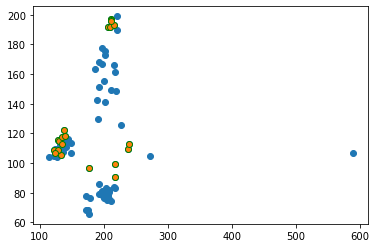

In [66]:
ind=np.where(voice2['status']==0)
plt.scatter(voice2['MDVP:Fhi(Hz)'],voice2['MDVP:Flo(Hz)'])
y=voice2.values
plt.scatter(y[ind,1], y[ind,2], edgecolors="g")
voice2['status'].value_counts()

In [67]:
print("Percentage of Outliers in Original dataset\n",
      (voice2['status'].value_counts()/voice['status'].value_counts())*100)

Percentage of Outliers in Original dataset
 1    47.619048
0    43.750000
Name: status, dtype: float64


In [68]:
from sklearn.svm import OneClassSVM

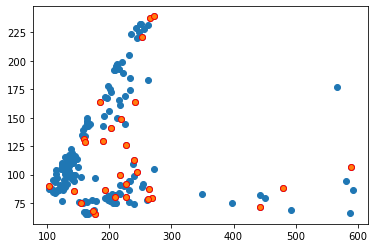

In [74]:
model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.03).fit(voice)
y_pred = model.predict(voice)
outlier_index = np.where(y_pred == -1) 
plt.scatter(x2[:,1],x2[:,2])
plt.scatter(x2[outlier_index,1], x2[outlier_index,2], edgecolors="r")
voice2=voice.loc[outlier_index]

1    22
0     7
Name: status, dtype: int64

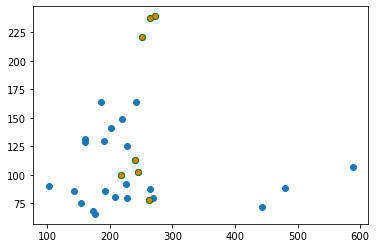

In [75]:
ind=np.where(voice2['status']==0)
plt.scatter(voice2['MDVP:Fhi(Hz)'],voice2['MDVP:Flo(Hz)'])
y=voice2.values
plt.scatter(y[ind,1], y[ind,2], edgecolors="g")
voice2['status'].value_counts()

In [76]:
print("Percentage of Outliers in Original dataset\n",
      (voice2['status'].value_counts()/voice['status'].value_counts())*100)

Percentage of Outliers in Original dataset
 1    14.965986
0    14.583333
Name: status, dtype: float64
